# INFO-F-422 -  Statistical Foundations of Machine Learning

### Gian Marco Paldino - __[gian.marco.paldino@ulb.be](mailto:gian.marco.paldino@ulb.be)__
### Cédric Simar - __[cedric.simar@ulb.be](mailto:cedric.simar@ulb.be)__

## TP 2 - Linear Models

####  March 2023

#### Materials originally developed by *Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi*

### Estimation using the mean square error

Assume to have $N$ observation pairs $(x_i,y_i)$ generated by the following stochastic process

\begin{equation*}
 y_i=\beta_0+\beta_1 x_i +w_i,
\end{equation*}

where the $w_i$ are iid realisations of a random variable $\mathbf{w}$ with mean zero and constant variance $\sigma^2_{\mathbf{w}}$.

The $x_i$ can be seen as *fixed*, the only random component in the sample set $D_N$ is therefore contained in the $y_i$ (which are random due to the $w_i$).

The coefficients $\beta_0$ and $\beta_1$ can be estimated using the least squares method. This method consists of taking those estimators $\hat{\beta_0}$ and $\hat{\beta_1}$ which minimize

\begin{equation}
 R_{emp}=\sum_{i=1}^N (y_i-\hat{y_i})^2
\end{equation}

where

\begin{equation}
 \hat{y_i}=\hat{\beta_0}+\hat{\beta_1} x_i.
\end{equation}

This is equivalent to

\begin{equation}
 \{\hat{\beta_0},\hat{\beta_1}\}=\arg\min_{b_0,b_1}\sum_{i=1}^N (y_i-b_0-b_1x_i)^2.
\end{equation}

The solution is given by *(Eq. 1)*

\begin{equation}
 \hat{\beta_1}=\frac{S_{xy}}{S_{xx}},\quad \hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x},  
\end{equation}

where *(Eq. 2)*

\begin{equation}
 \bar{x}=\frac{\sum_{i=1}^Nx_i}{N},\quad\bar{y}=\frac{\sum_{i=1}^Ny_i}{N},\quad S_{xy}=\sum_{i=1}^N (x_i-\bar{x})y_i,\quad S_{xx}=\sum_{i=1}^N(x_i-\bar{x})^2.
\end{equation}

### Properties of the estimator

* $E_{D_N}[\hat{\beta_1}]=\beta_1$
* $Var[\hat{\beta_1}]=\frac{\sigma^2}{S_{xx}}$
* $E[\hat{\beta_0}]=\beta_0$
* $Var[\hat{\beta_0}]=\sigma^2\left( \frac{1}{N}+\frac{\bar{x}^2}{S_{xx}}\right)$
* $\hat{\sigma}^2_{\mathbf{w}}=\frac{\sum_{i=1}^N(y_i-\hat{y_i})^2}{N-2}$ is a non-biased estimator of $\sigma^2_{\mathbf{w}}$.


### Partitioning the variability

The variability of the response $y_i$ can be expressed as follows

\begin{equation}
 \sum_{i=1}^N(y_i-\bar{y})^2=\sum_{i=1}^N(\hat{y_i}-\bar{y})^2+\sum_{i=1}^N(y_i-\hat{y_i})^2,
\end{equation}

that is

\begin{equation}
 SS_{tot}=SS_{mod}+SS_{res}.
\end{equation}

### The F-test

Goal: test if the variable $y$ is really influenced by the variable $x$. This can be formulated as a hypothesis test $\beta_1=0$. If the test is rejected, it can be deduced that $x$ influences $y$ significantly.

It can be shown that given a normally distributed $\mathbf{w}$: *(Eq. 3)*

\begin{equation}
 \frac{SS_{mod}}{SS_{res}/(N-2)} \sim F_{1,N-2}
\end{equation}

if the hypothesis $\beta_1=0$ is true.

### The t-test

It can be shown that given a normally distributed $\mathbf{w}$:

\begin{equation}
 \hat{\beta_1}\sim \mathcal{N}(\beta_1,\sigma^2 / S_{xx})
\end{equation}

and

\begin{equation}
 \frac{\hat{\beta_1}-\beta_1}{\hat{\sigma}}\sqrt{S_{xx}} \sim \mathcal{T}_{N-2}.
\end{equation}

This can be used for testing the following hypothesis: $\hat{\beta_1}=\beta_1$.

### Confidence intervals

With a probability $1-\alpha$, the true parameter $\beta_1$ lies in the interval *(Eq. 4)*

\begin{equation}
 \hat{\beta_1}\pm t_{\alpha/2,N-2}\cdot \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}.
\end{equation}

### Variance of the response

Let

\begin{equation}
 \hat{\mathbf{y}}(x)=\hat{\beta_0}+\hat{\beta_1} x.
\end{equation}

We can show that for all $x$:

\begin{equation}
 E_{D_N}[ \hat{\mathbf{y}}(x)]=E_{[y]}[ {\mathbf{y}}(x)]
\end{equation}

and

\begin{equation}
 Var[ \hat{\mathbf{y}}(x)]=\sigma^2\left[\frac{1}{N}+\frac{(x-\bar{x})^2}{S_{xx}}\right].
\end{equation}



## Linear regression exercises

### Exercise 1

Compare with the theoretical part of this course (from slide 15 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1728621/mod_resource/content/5/linregr.pdf)).

The goal of this exercise is to investigate the link between two variables originating from medical data by studying the *ventricular shortening velocity* in function of *blood glucose*.


In [3]:
install.packages("ISwR")
library(ISwR)
data(thuesen)

I <-! is.na(thuesen[,"short.velocity"])
Y<-thuesen[I,"short.velocity"]
X<-thuesen[I,"blood.glucose"]


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
head(thuesen)

,blood.glucose,short.velocity
,<dbl>,<dbl>
1,15.3,1.76
2,10.8,1.34
3,8.1,1.27
4,19.5,1.47
5,7.2,1.27
6,5.3,1.49


*  Apply the mean square method "by hand" using equations (Eq. 1) and (Eq. 2) to compute the coefficients $\beta_0$ and $\beta_1$ of a linear model for our data.


In [16]:
x_hat = sum(X)/length(X)
x_hat
Sxx = sum((X-x_hat)^2)
Sxx
Sxy = sum((X-x_hat)*Y)
Sxy
b1_hat = Sxy/Sxx
b1_hat
x_hat = sum(X)/length(X)

y_hat = sum(Y)/length(Y)

b0_hat = y_hat-b1_hat*x_hat
b0_hat

# y¯−β1^x


# b0_hat

[1] 10.37391

[1] 429.7043

[1] 9.437391

[1] 0.02196252

[1] 1.097815

*  Test the hypothesis $\beta_1=0$ using an F-test using equation *(Eq. 3)* and the F distribution function `pf` followed by a t-test using equation *(Eq. 4)* and the t distribution function `pt`. Note that F-test is used to assess if the whole model is relevant. In the considered case (univariate regression) the model is defined by a single parameter ($\beta_1$).


In [ ]:
b1 <- 0
ssRes <- sum(Y-y_hat)
ssMod <- sum(y_hat-)

*  Compute the confidence interval for $\beta_1$ using equation (Eq. 4) and the function `qt`.



*  Use the function `lm`(Y$^{\sim}$X) to obtain the same results automatically and compare these with the ones obtained earlier.


*  Visualize the data and the regression line


In [20]:
result_lm <- lm(Y~X)
summary(result_lm)


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40141 -0.14760 -0.02202  0.03001  0.43490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.09781    0.11748   9.345 6.26e-09 ***
X            0.02196    0.01045   2.101   0.0479 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2167 on 21 degrees of freedom
Multiple R-squared:  0.1737,	Adjusted R-squared:  0.1343 
F-statistic: 4.414 on 1 and 21 DF,  p-value: 0.0479


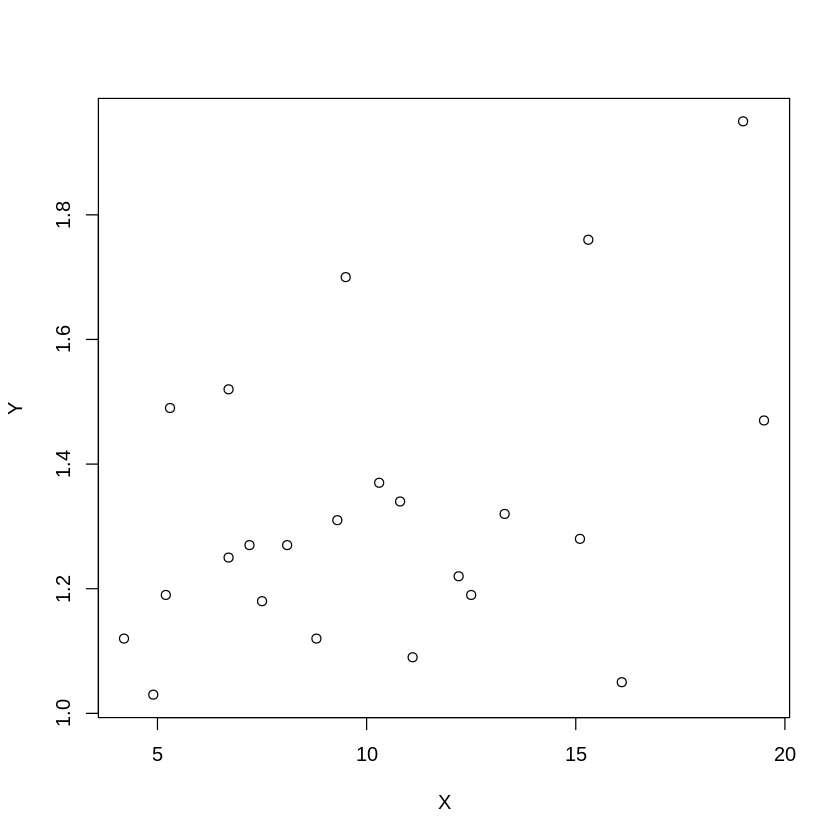

In [22]:
x <- seq(min(X), max(X),by=.1)
plot(X,Y)
# lines(x,bO_hat)

### Exercise 2

The goal of this exercise is to experimentally study the bias and the variance of $\hat{\beta_0}$, $\hat{\beta_1}$, $\hat{\sigma}$ and $\hat{\mathbf{y}}(x_i)$. See also the theoretical part of this course (slide 24 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1728621/mod_resource/content/5/linregr.pdf)).


In [23]:
rm(list=ls())
X<-seq(-10,10,by=1) # the x_i are fixed
beta0<--1 # y_i = -1 + x_i + Normal(0,5)
beta1<-1
sd.w<-5
N<-length(X)
R<-100#00 # number of iterations for the simulation


In [ ]:
beta.hat.1<-numeric(R)
beta.hat.0<-numeric(R)
var.hat.w<-numeric(R)
Y.hat<-array(NA,c(R,N))




* Compute $\hat{\beta}_0$, $\hat{\beta}_1$ and $\hat{\sigma}$ and plot their distributions.


* Illustrate the theorem $Var[y(x_0)]=\sigma^2\left(\frac{1}{N}+\frac{(x_0-\bar{x})^2}{S_{xx}}\right)$.


## Multiple regression exercise

This example is taken from the theoretical part of this course (slide 27 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1257537/mod_resource/content/4/linregr.pdf)).

Mutiple linear dependence occurs when the variable $x$ is a vector instead of a scalar. The goal of this exercise is to verify the theoretical results for the estimators $\hat{\mathbf{\sigma}}^2$ and $\hat{\mathbf{\beta} }$ obtained for the least squares method (no bias and analytical results concerning $Var[\hat{\mathbf{\beta}}]$).


In [25]:
rm(list=ls())
library(MASS)

# initial values for n, (sigma_w) and beta
n<-3 # number of input variables
p<-n+1
beta<-seq(2,p+1) # beta =(2,3,...,n+2)
sd.w<-5

# generating data D_N
N<-100 # number of samples
X<-array(runif(N*n,min=-20,max=20),c(N,n))
X<-cbind(array(1,c(N,1)),X)


R<-100#00 # number of iterations
beta.hat<-array(0,c(p,R))
var.hat.w<-numeric(R)
Y.hat<-array(NA,c(R,N))

* Compute $\hat{Y}$, $\hat{\beta}$ and $\hat{\sigma}$ following the equations in the course slides 35 and 36.


* Plot the histograms for $\hat{\sigma}$ and for each $\hat{\beta}$
